In [87]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage import exposure
from PIL import Image

In [88]:
# Preprocessing function
def preprocess_images(X):
    X_preprocessed = []
    for image in X:
        # Apply contrast stretching
        p2, p98 = np.percentile(image, (2, 98))
        img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98), out_range=(0, 1))
        
        # Clip the values to the valid range [0, 1]
        img_rescale = np.clip(img_rescale, 0, 1)
        
        # Flatten the preprocessed image
        img_flat = img_rescale.flatten()
        X_preprocessed.append(img_flat)
    return np.array(X_preprocessed)

In [89]:
# Load the MNIST dataset from CSV
train_data = pd.read_csv('mnist_train.csv')
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Unique labels in y_train:", np.unique(y_train))

Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


In [90]:
X_train[0].shape

(784,)

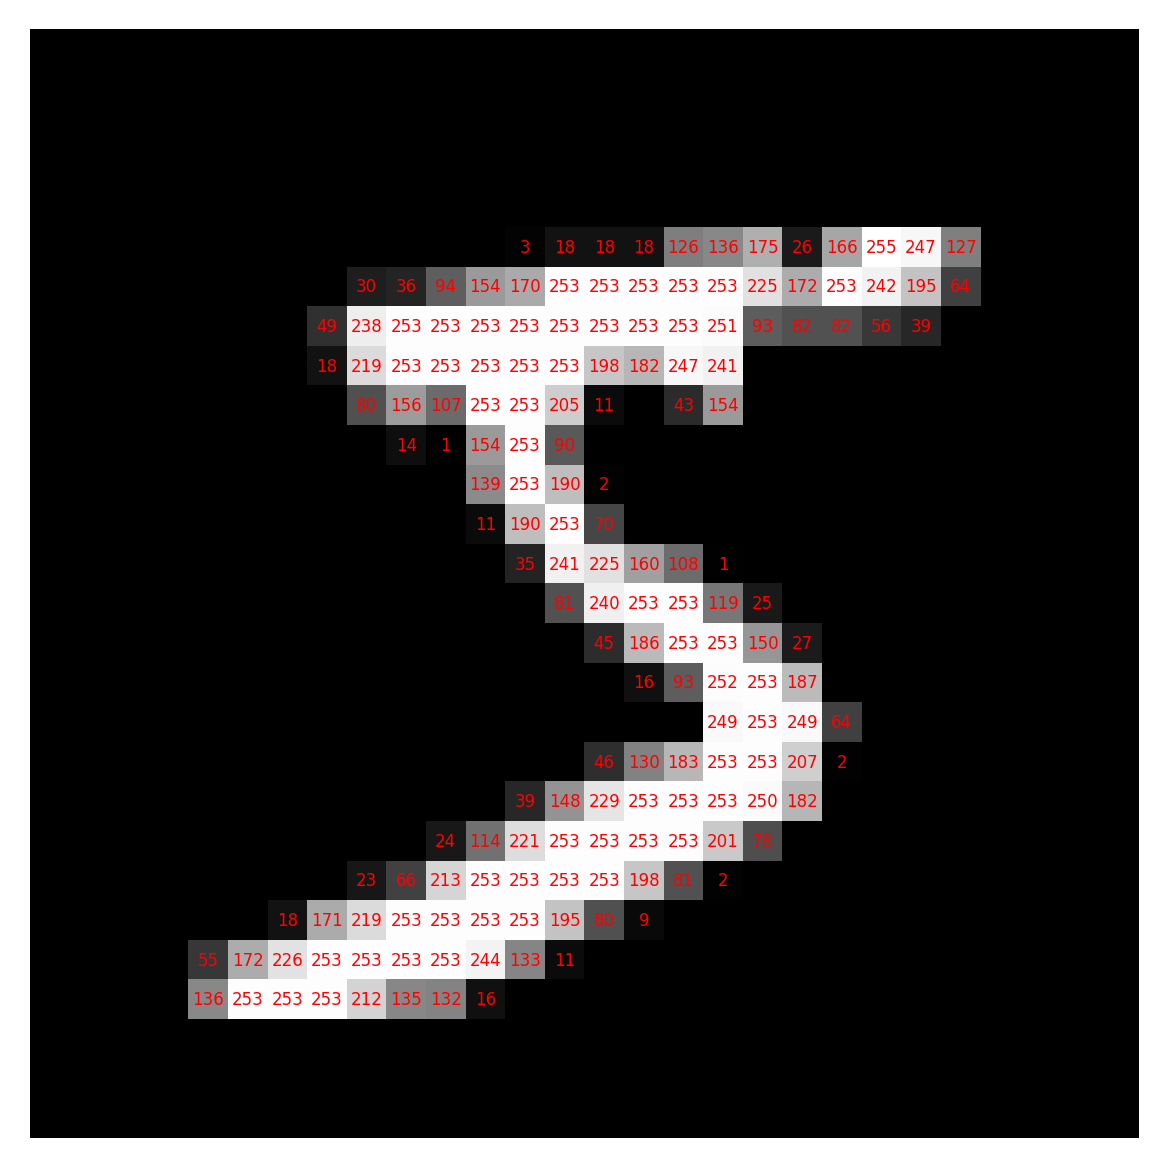

In [91]:
import matplotlib.pyplot as plt
# Plot the first image before contrast stretching with matplotlib
# Reshape the image
image = X_train[0].reshape(28, 28)

plt.figure(dpi=300)

# Plot the image
plt.imshow(image, cmap='gray', interpolation='none')

# Iterate over the image array and add the pixel values as text
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] != 0:
            plt.text(j, i, str(image[i, j]), ha='center', va='center', color='red', fontsize=4)

plt.axis('off')
plt.show()

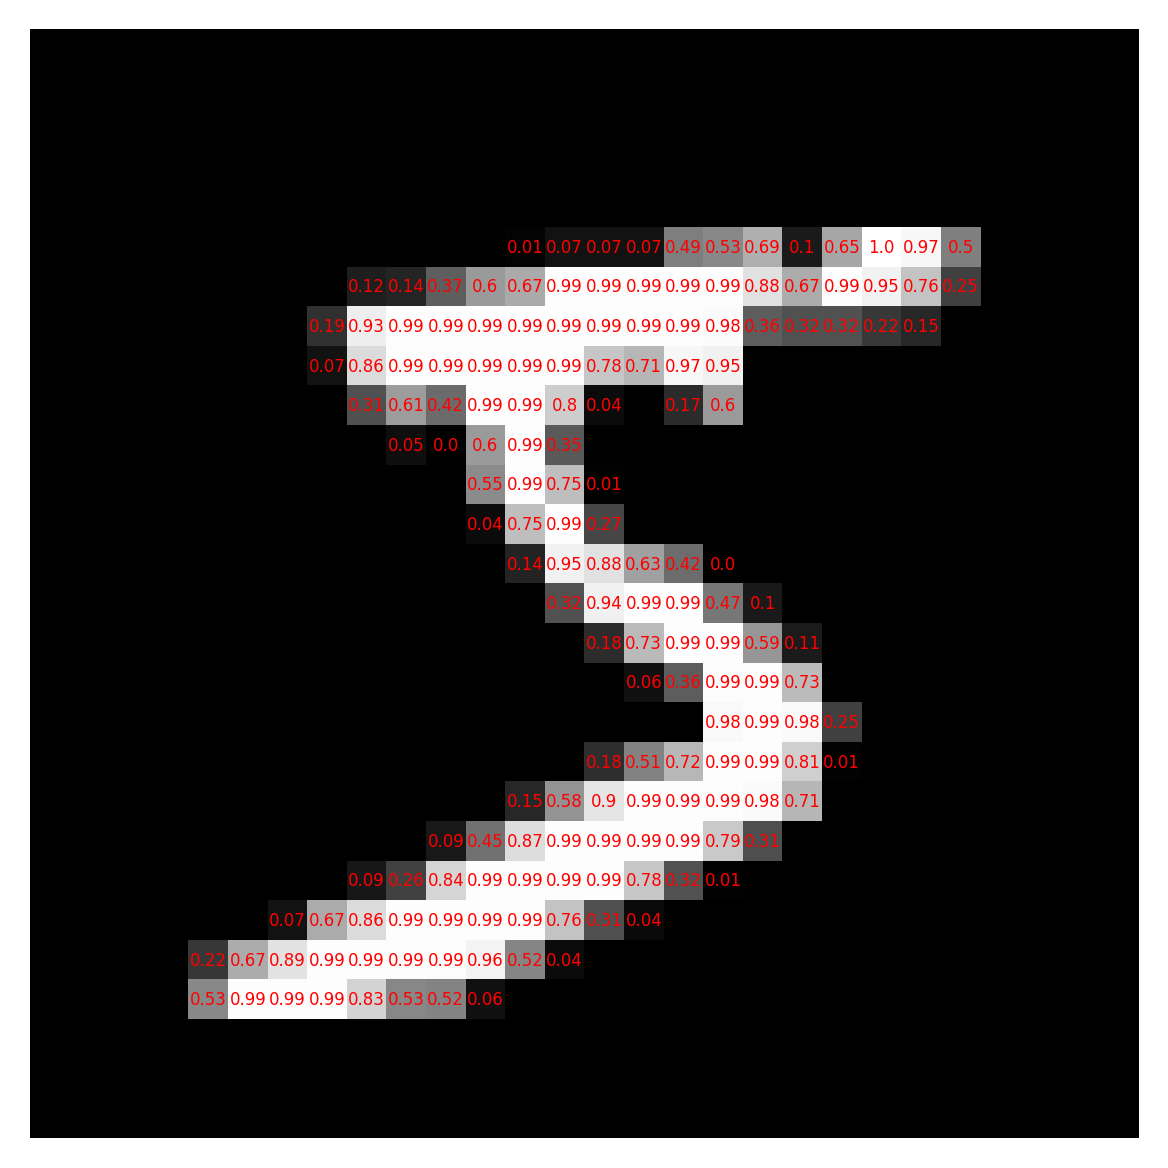

In [92]:
# Apply contrast stretching
image_rescale = exposure.rescale_intensity(
    image, in_range=(0, 255), out_range=(0, 1)
)

# Clip the values to the valid range [0, 1]
image_rescale = np.clip(image_rescale, 0, 1)

# Plot the first image after contrast stretching with matplotlib
plt.figure(dpi=300)

# Plot the image
plt.imshow(image_rescale, cmap='gray', interpolation='none')

# Iterate over the image array and add the pixel values as text
for i in range(image_rescale.shape[0]):
    for j in range(image_rescale.shape[1]):
        if image_rescale[i, j] != 0:
            plt.text(j, i, str(round(image_rescale[i, j], 2)), ha='center', va='center', color='red', fontsize=4)

plt.axis('off')
plt.show()

In [93]:
# Reshape the training images to 2D arrays
X_train = X_train.reshape(-1, 28, 28)

# Preprocess the training images
X_train_preprocessed = preprocess_images(X_train)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

In [94]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [95]:
X_train[0].shape

(28, 28)

In [96]:
# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2]
}

# Perform grid search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_split, y_train_split)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'min_samples_split': [2],
                         'n_estimators': [100]})

In [97]:
# Train the final model with the best hyperparameters on the entire training set
final_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
final_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [98]:
# Load the test dataset from CSV
test_data = pd.read_csv('mnist_test.csv')
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Unique labels in y_test:", np.unique(y_test))

Shape of X_test: (10000, 784)
Shape of y_test: (10000,)
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


In [99]:
# Reshape the test images to 2D arrays
X_test = X_test.reshape(-1, 28, 28)

In [100]:
# Preprocess the test images
X_test_preprocessed = preprocess_images(X_test)

print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)

Shape of X_test_preprocessed: (10000, 784)


In [101]:
# Make predictions on the test set
y_pred = final_model.predict(X_test_preprocessed)

print("Unique predicted labels:", np.unique(y_pred))

Unique predicted labels: [0 1 2 3 4 5 6 7 8 9]


In [102]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [103]:
# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Evaluation Metrics:
Accuracy: 0.9699
Precision: 0.9699
Recall: 0.9699
F1 Score: 0.9699


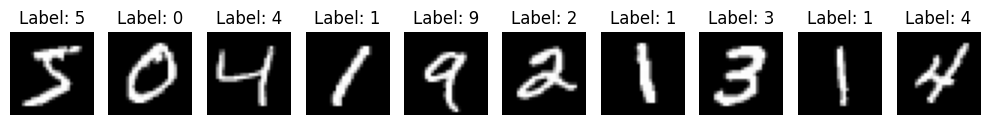

In [104]:
import matplotlib.pyplot as plt

# Visualize sample images from the training set
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    img = X_train[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

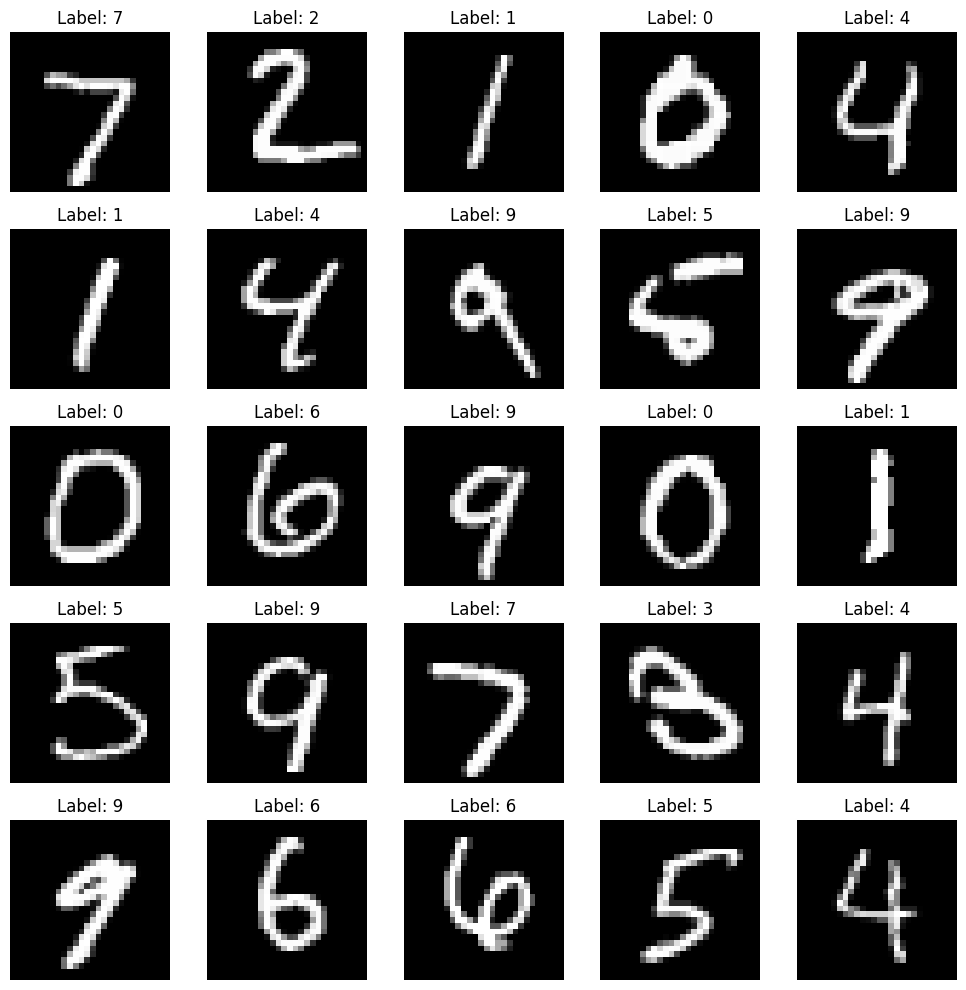

In [105]:
# Visualize sample images from the test set
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    img = X_test[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [106]:
# Function to predict the digit for a given image file
def predict_digit(image_path, model):
    # Load the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    
    # Resize the image to match the MNIST dataset dimensions (28x28)
    image = image.resize((28, 28))
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Reshape and preprocess the input image
    image_preprocessed = preprocess_images(image_array.reshape(1, 28, 28))
    
    # Make prediction using the trained model
    predicted_label = model.predict(image_preprocessed)
    print("Predicted label:", predicted_label)
    print("Prediction confidence:", model.predict_proba(image_preprocessed))
    return predicted_label[0]

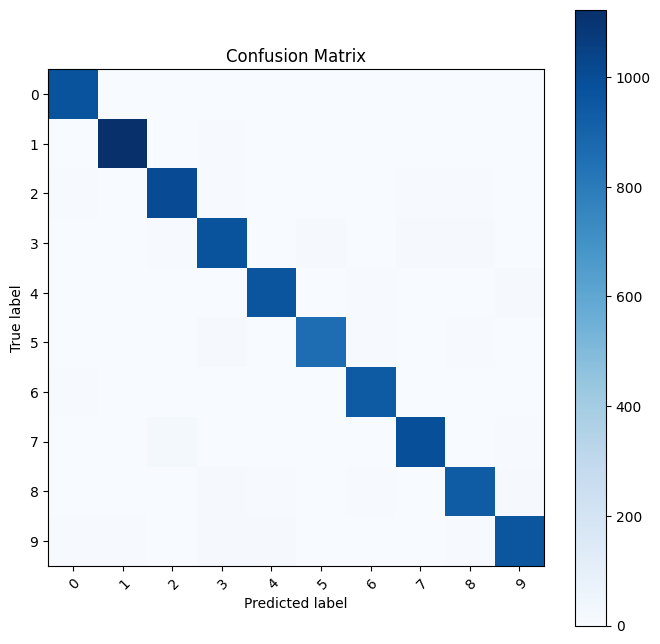

In [107]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

In [108]:
# Select a subset of the test set
subset_size = 3000
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
X_test_subset = X_test[subset_indices]
y_test_subset = y_test[subset_indices]

# Preprocess the subset of test images
X_test_subset_preprocessed = preprocess_images(X_test_subset.reshape(-1, 28, 28))

# Make predictions on the subset of test images
y_pred_subset = final_model.predict(X_test_subset_preprocessed)

# Calculate evaluation metrics for the subset
accuracy_subset = accuracy_score(y_test_subset, y_pred_subset)
precision_subset = precision_score(y_test_subset, y_pred_subset, average='weighted')
recall_subset = recall_score(y_test_subset, y_pred_subset, average='weighted')
f1_subset = f1_score(y_test_subset, y_pred_subset, average='weighted')

print("Evaluation Metrics (Subset):")
print("Accuracy: {:.4f}".format(accuracy_subset))
print("Precision: {:.4f}".format(precision_subset))
print("Recall: {:.4f}".format(recall_subset))
print("F1 Score: {:.4f}".format(f1_subset))

Evaluation Metrics (Subset):
Accuracy: 0.9683
Precision: 0.9685
Recall: 0.9683
F1 Score: 0.9683


In [115]:
# Save model
import joblib

# Save the final model to disk
joblib.dump(final_model, 'mnist_rf_model.pkl')

['mnist_rf_model.pkl']

In [116]:
# Load the model from disk
loaded_model = joblib.load('mnist_rf_model.pkl')

In [118]:
# Get the image file path from the user
image_path = './7.png'

# Make prediction on the user input image
predicted_digit = predict_digit(image_path, loaded_model)
print("Predicted Digit:", predicted_digit)

Predicted label: [7]
Prediction confidence: [[0.   0.   0.   0.   0.   0.01 0.   0.99 0.   0.  ]]
Predicted Digit: 7
